In [32]:
import numpy as np
from Experiment import *

In [44]:
def reject_outliers(data, enabled=True, m=1):
    if enabled:
        raise NotImplementedError
        return data[abs(data - np.mean(data)) < m * np.std(data)]
    else:
        return data[:,0], data[:,1]

In [45]:
def plot_final_discrete(final_means, final_stds, xs, title, xlabel, legends, fname):
    fig, ax = plt.subplots()
    clrs = sns.color_palette("husl", len(legends))

    with sns.axes_style("darkgrid"):
        for i, color in enumerate(clrs):
            stds = [[final_means[i][j] if final_means[i][j] - final_stds[i][j] < 0 else final_stds[i][j], 0.5 - final_means[i][j] if final_means[i][j] + final_stds[i][j] > 0.5 else final_stds[i][j]] for j in range(len(final_means[i]))]
            stds = np.array(stds).T
            ax.errorbar(xs, final_means[i], yerr=stds, fmt='o', linestyle='dashed', capsize=3,
                        label=legends[i], c=color)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig("exp1", dpi=600, bbox_inches='tight')
    # plt.show()
    plt.close()

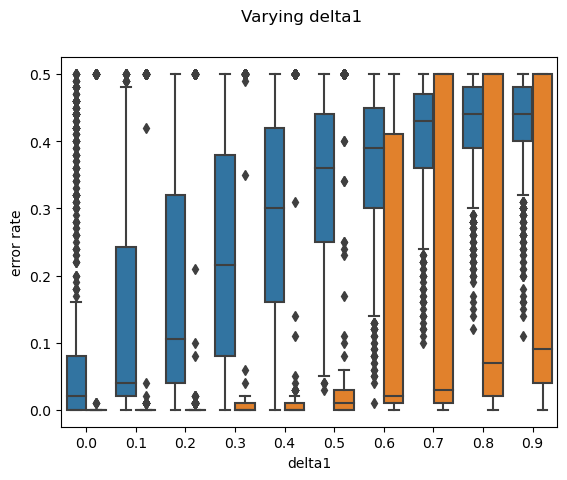

In [51]:
n = 100

# param_name, param_list, exp_num = "T", range(5, 50, 5), 1
# param_name, param_list, exp_num = "H", range(int(n / 5), n + 10, 10), 2
# param_name, param_list, exp_num = "eta", [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0], 3
param_name, param_list, exp_num = "delta1", [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 4
# param_name, param_list, exp_num = "delta2", [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 5
# param_name, param_list, exp_num = "delta3", [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 6

data = np.load(f"raw_datas/exp{exp_num}.npz")
data = data['dfs']

dfs = []
for i, param in enumerate(param_list):
    init, final = reject_outliers(data[i], False)

    dfs.append(pd.DataFrame(np.array([init, final]).T,
                                columns=["Init. Spec.", "Init. Spec. + Likelihood Improv."]).assign(param=param))

# plot and save
cdf = pd.concat(dfs)
mdf = pd.melt(cdf, id_vars=["param"], var_name="Algorithm", value_name="error rate")

fig, ax = plt.subplots()
g = sns.boxplot(x="param", y="error rate", hue="Algorithm", data=mdf, ax=ax, whis=1.1).set(xlabel=param_name)
plt.legend([],[], frameon=False)
# sns.stripplot(x="H", y="error rate", hue="Algorithm", data=mdf, dodge=True, ax=ax, legend=False)
fig.suptitle(f"Varying {param_name}")
plt.savefig(f"results/plot_exp{exp_num}.pdf", dpi=500)

plt.show()
plt.clf()
plt.close()

In [11]:
# mean_1, mean_2 = [], []
# std_1, std_2 = [], []
# inits, finals = [], []
#
# for T in range(dfs.shape[0]):
#     init = reject_outliers(dfs[T][:,0])
#     final = reject_outliers(dfs[T][:,1])
#     # init = dfs[T][:,0]
#     # final = dfs[T][:,1]
#
#     inits.append(init)
#     finals.append(final)
#
#     mean_1.append(np.mean(init))
#     mean_2.append(np.mean(final))
#
#     std_1.append(np.std(init))
#     std_2.append(np.std(final))
#
# mean_1 = np.array(mean_1)
# mean_2 = np.array(mean_2)
# std_1 = np.array(std_1)
# std_2 = np.array(std_2)
#
# for T in range(dfs.shape[0]):
#     print(f"{mean_2[T]} &", end=" ")
#
# means = [mean_1, mean_2]
# stds = [std_1, std_2]
#
# plot_final_discrete(means, stds, range(20,110,10), "Varying H (n=100, T=20, eps=0.3)", "H", ["init clustering", "init clustering + likelihood improvement"], None)

0.33620999999999995 & 0.24156 & 0.16369 & 0.09122999999999999 & 0.0024836601307189547 & 0.0007067510548523206 & 0.00026041666666666666 & 0.00011434511434511434 & 0.00031479538300104937 & 